# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

    # import Data & explore the shape

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = None)

In [3]:
loan_data_inputs_train.shape

(373028, 329)

In [4]:
loan_data_targets_train.shape

(373028, 1)

In [5]:
loan_data_inputs_test.shape

(93257, 329)

In [6]:
loan_data_targets_test.shape

(93257, 1)

In [7]:
# Selecting the features

In [8]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_date:<38',
'mths_since_issue_date:38-39',
'mths_since_issue_date:40-41',
'mths_since_issue_date:42-48',
'mths_since_issue_date:49-52',
'mths_since_issue_date:53-64',
'mths_since_issue_date:65-84',
'mths_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>= 5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>= 52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K - 30K',
'annual_inc:30K - 40K',
'annual_inc:40K - 50K',
'annual_inc:50K - 60K',
'annual_inc:60K - 70K',
'annual_inc:70K - 80K',
'annual_inc:80K - 90K',
'annual_inc:90K - 100K',
'annual_inc:100K - 120K',
'annual_inc:120K - 140K',
'annual_inc:>152K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_delinq:>=86']]

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [9]:
ref_categories = ['grade:G', 
                 'home_ownership:RENT_OTHER_NONE_ANY',
                 'addr_state:ND_NE_IA_NV_FL_HI_AL',
                 'verification_status:Not Verified',
                 'purpose:oth__med__vacation',
                 'initial_list_status:f',
                 'term:60',
                 'emp_length:0',
                 'mths_since_issue_date:>84',
                 'int_rate:>20.281',
                 'mths_since_earliest_cr_line:<140',
                 'delinq_2yrs:>=4',
                 'inq_last_6mths:>6',
                 'open_acc:0',
                 'pub_rec:0-2',
                 'total_acc:<=27',
                 'acc_now_delinq:0',
                 'total_rev_hi_lim:<=5K',
                  'annual_inc:<20K',
                 'dti:>35',
                 'mths_since_last_delinq:0-3',
                 'mths_since_last_record:0-2']

In [10]:
pd.options.display.max_columns = None

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>= 5,total_acc:28-51,total_acc:>= 52,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K - 30K,annual_inc:30K - 40K,annual_inc:40K - 50K,annual_inc:50K - 60K,annual_inc:60K - 70K,annual_inc:70K - 80K,annual_inc:80K - 90K,annual_inc:90K - 100K,annual_inc:100K - 120K,annual_inc:120K - 140K,annual_inc:>152K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_delinq:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [12]:
pd.options.display.max_rows = None
inputs_train.isnull().sum()

grade:A                                         0
grade:B                                         0
grade:C                                         0
grade:D                                         0
grade:E                                         0
grade:F                                         0
home_ownership:OWN                              0
home_ownership:MORTGAGE                         0
addr_state:NM_VA                                0
addr_state:NY                                   0
addr_state:OK_TN_MO_LA_MD_NC                    0
addr_state:CA                                   0
addr_state:UT_KY_AZ_NJ                          0
addr_state:AR_MI_PA_OH_MN                       0
addr_state:RI_MA_DE_SD_IN                       0
addr_state:GA_WA_OR                             0
addr_state:WI_MT                                0
addr_state:TX                                   0
addr_state:IL_CT                                0
addr_state:KS_SC_CO_VT_AK_MS                    0


    # PD Model Estimation
    
    Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
logreg = LogisticRegression()

In [15]:
pd.options.display.max_rows = None

In [16]:
logreg.fit(inputs_train, loan_data_targets_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
logreg.intercept_

array([-1.20011045])

In [18]:
logreg.coef_

array([[ 1.12051026,  0.88155865,  0.68732296,  0.49940447,  0.32418775,
         0.13647758,  0.09138786,  0.1067031 ,  0.03768384,  0.05953879,
         0.06036883,  0.06310425,  0.0790557 ,  0.13653047,  0.10058159,
         0.18559477,  0.24142117,  0.22465836,  0.26313047,  0.32145552,
         0.52260948, -0.09924754, -0.08866422, -0.21524951,  0.09078027,
        -0.01291433,  0.05281955,  0.053867  ,  0.07919051,  0.10063824,
         0.12568546,  0.09068028,  0.06064429,  0.12325855,  1.07304731,
         0.87265283,  0.7722049 ,  0.57136264,  0.41030673,  0.16497841,
        -0.07107644,  0.88052206,  0.5547871 ,  0.30351378,  0.11150408,
         0.06704952,  0.04088999,  0.08200508,  0.12280875,  0.12741013,
         0.10547329,  0.04981278,  0.66498363,  0.52137581,  0.31231567,
         0.12164678,  0.02487025, -0.00142896, -0.02735408, -0.01979432,
         0.00928236, -0.09647443,  0.12257848,  0.16518042, -0.02004453,
         0.02828361,  0.15101308,  0.04305267,  0.0

In [19]:
feature_name = inputs_train.columns.values

In [20]:
summary_tab = pd.DataFrame(columns = ['feature_name'], data=feature_name)
summary_tab['Coefficients'] = np.transpose(logreg.coef_)
summary_tab.index = summary_tab.index + 1
summary_tab.loc[0] = ['Intercept', logreg.intercept_[0]]
summary_tab = summary_tab.sort_index()
summary_tab

,feature_name,Coefficients
0,Intercept,-1.200110
1,grade:A,1.120510
2,grade:B,0.881559
3,grade:C,0.687323
4,grade:D,0.499404
5,grade:E,0.324188
6,grade:F,0.136478
7,home_ownership:OWN,0.091388
8,home_ownership:MORTGAGE,0.106703
9,addr_state:NM_VA,0.037684


    # Building the Model with p-values and check the statistical significance

In [21]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
logreg = LogisticRegression_with_p_values()

In [23]:
logreg.fit(inputs_train, loan_data_targets_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
summary_tab = pd.DataFrame(columns = ['feature_name'], data=feature_name)
summary_tab['Coefficients'] = np.transpose(logreg.coef_)
summary_tab.index = summary_tab.index + 1
summary_tab.loc[0] = ['Intercept', logreg.intercept_[0]]
summary_tab = summary_tab.sort_index()
summary_tab

,feature_name,Coefficients
0,Intercept,-1.200110
1,grade:A,1.120510
2,grade:B,0.881559
3,grade:C,0.687323
4,grade:D,0.499404
5,grade:E,0.324188
6,grade:F,0.136478
7,home_ownership:OWN,0.091388
8,home_ownership:MORTGAGE,0.106703
9,addr_state:NM_VA,0.037684


In [25]:
p_values = logreg.p_values

In [26]:
p_values = np.append(np.nan, np.array(p_values))

In [27]:
summary_tab['p_values'] = p_values

In [28]:
summary_tab

,feature_name,Coefficients,p_values
0,Intercept,-1.200110,NaN
1,grade:A,1.120510,6.254633e-35
2,grade:B,0.881559,2.896087e-47
3,grade:C,0.687323,4.697882e-34
4,grade:D,0.499404,9.879781e-21
5,grade:E,0.324188,7.788741e-12
6,grade:F,0.136478,5.579349e-03
7,home_ownership:OWN,0.091388,5.897695e-06
8,home_ownership:MORTGAGE,0.106703,4.368425e-17
9,addr_state:NM_VA,0.037684,2.394738e-01


    # Selecting the significant variables

In [29]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_date:<38',
'mths_since_issue_date:38-39',
'mths_since_issue_date:40-41',
'mths_since_issue_date:42-48',
'mths_since_issue_date:49-52',
'mths_since_issue_date:53-64',
'mths_since_issue_date:65-84',
'mths_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'annual_inc:<20K',
'annual_inc:20K - 30K',
'annual_inc:30K - 40K',
'annual_inc:40K - 50K',
'annual_inc:50K - 60K',
'annual_inc:60K - 70K',
'annual_inc:70K - 80K',
'annual_inc:80K - 90K',
'annual_inc:90K - 100K',
'annual_inc:100K - 120K',
'annual_inc:120K - 140K',
'annual_inc:>152K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_delinq:>=86']]

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [30]:
ref_categories = ['grade:G', 
                 'home_ownership:RENT_OTHER_NONE_ANY',
                 'addr_state:ND_NE_IA_NV_FL_HI_AL',
                 'verification_status:Not Verified',
                 'purpose:oth__med__vacation',
                 'initial_list_status:f',
                 'term:60',
                 'emp_length:0',
                 'mths_since_issue_date:>84',
                 'int_rate:>20.281',
                 'mths_since_earliest_cr_line:<140',
                 'inq_last_6mths:>6',
                 'open_acc:0',
                  'annual_inc:<20K',
                 'dti:>35',
                 'mths_since_last_delinq:0-3',
                 'mths_since_last_record:0-2']

In [31]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,annual_inc:20K - 30K,annual_inc:30K - 40K,annual_inc:40K - 50K,annual_inc:50K - 60K,annual_inc:60K - 70K,annual_inc:70K - 80K,annual_inc:80K - 90K,annual_inc:90K - 100K,annual_inc:100K - 120K,annual_inc:120K - 140K,annual_inc:>152K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_delinq:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [32]:
pd.options.display.max_rows = None
inputs_train.isnull().sum()

grade:A                                         0
grade:B                                         0
grade:C                                         0
grade:D                                         0
grade:E                                         0
grade:F                                         0
home_ownership:OWN                              0
home_ownership:MORTGAGE                         0
addr_state:NM_VA                                0
addr_state:NY                                   0
addr_state:OK_TN_MO_LA_MD_NC                    0
addr_state:CA                                   0
addr_state:UT_KY_AZ_NJ                          0
addr_state:AR_MI_PA_OH_MN                       0
addr_state:RI_MA_DE_SD_IN                       0
addr_state:GA_WA_OR                             0
addr_state:WI_MT                                0
addr_state:TX                                   0
addr_state:IL_CT                                0
addr_state:KS_SC_CO_VT_AK_MS                    0


In [33]:
logreg_pval  = LogisticRegression_with_p_values()
logreg_pval.fit(inputs_train, loan_data_targets_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
feature_name1 = inputs_train.columns.values
feature_name1

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA', 'addr_state:NY',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Source Verified',
       'verification_status:Verified',
       'purpose:educ__sm_b__wedd__ren_en__mov__house',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'major_purch__car__home_impr', 'initial_list_status:w', 'term:36',
       'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'emp_length:10', 'mths_since_issue_date:<38',
       'mths_since_issue_date:38-39', 'mths_since_issue_date:40-41',
       'mths_since_issue_date:42-48', 'mth

In [35]:
summary_table = pd.DataFrame(columns = ['feature name1'], data = feature_name1)
summary_table['Coefficients'] = np.transpose(logreg_pval.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', logreg_pval.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,feature name1,Coefficients
0,Intercept,-1.091182
1,grade:A,1.126243
2,grade:B,0.883510
3,grade:C,0.688599
4,grade:D,0.500314
5,grade:E,0.324259
6,grade:F,0.135611
7,home_ownership:OWN,0.094114
8,home_ownership:MORTGAGE,0.107479
9,addr_state:NM_VA,0.037045


In [36]:
p_values = logreg_pval.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,feature name1,Coefficients,p_values
0,Intercept,-1.091182,NaN
1,grade:A,1.126243,2.677771e-35
2,grade:B,0.883510,1.529112e-47
3,grade:C,0.688599,3.002120e-34
4,grade:D,0.500314,7.368673e-21
5,grade:E,0.324259,6.783840e-12
6,grade:F,0.135611,5.746117e-03
7,home_ownership:OWN,0.094114,2.990499e-06
8,home_ownership:MORTGAGE,0.107479,2.033138e-17
9,addr_state:NM_VA,0.037045,2.474207e-01


Out of sample validation test

In [37]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_date:<38',
'mths_since_issue_date:38-39',
'mths_since_issue_date:40-41',
'mths_since_issue_date:42-48',
'mths_since_issue_date:49-52',
'mths_since_issue_date:53-64',
'mths_since_issue_date:65-84',
'mths_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'annual_inc:<20K',
'annual_inc:20K - 30K',
'annual_inc:30K - 40K',
'annual_inc:40K - 50K',
'annual_inc:50K - 60K',
'annual_inc:60K - 70K',
'annual_inc:70K - 80K',
'annual_inc:80K - 90K',
'annual_inc:90K - 100K',
'annual_inc:100K - 120K',
'annual_inc:120K - 140K',
'annual_inc:>152K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_delinq:>=86']]

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [38]:
ref_categories = ['grade:G', 
                 'home_ownership:RENT_OTHER_NONE_ANY',
                 'addr_state:ND_NE_IA_NV_FL_HI_AL',
                 'verification_status:Not Verified',
                 'purpose:oth__med__vacation',
                 'initial_list_status:f',
                 'term:60',
                 'emp_length:0',
                 'mths_since_issue_date:>84',
                 'int_rate:>20.281',
                 'mths_since_earliest_cr_line:<140',
                 'inq_last_6mths:>6',
                 'open_acc:0',
                  'annual_inc:<20K',
                 'dti:>35',
                 'mths_since_last_delinq:0-3',
                 'mths_since_last_record:0-2']

In [39]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,annual_inc:20K - 30K,annual_inc:30K - 40K,annual_inc:40K - 50K,annual_inc:50K - 60K,annual_inc:60K - 70K,annual_inc:70K - 80K,annual_inc:80K - 90K,annual_inc:90K - 100K,annual_inc:100K - 120K,annual_inc:120K - 140K,annual_inc:>152K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_delinq:>=86
362514,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [40]:
y_hat_test = logreg_pval.model.predict(inputs_test)

In [41]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
y_hat_test_prob = logreg_pval.model.predict_proba(inputs_test)

In [43]:
y_hat_test_prob

array([[0.07568643, 0.92431357],
       [0.14069802, 0.85930198],
       [0.11319415, 0.88680585],
       ...,
       [0.02642402, 0.97357598],
       [0.03989309, 0.96010691],
       [0.0482574 , 0.9517426 ]])

In [44]:
y_hat_test_prob[:][:, 1]

array([0.92431357, 0.85930198, 0.88680585, ..., 0.97357598, 0.96010691,
       0.9517426 ])

In [45]:
y_hat_test_prob = y_hat_test_prob[:][:, 1]

In [46]:
y_hat_test_prob

array([0.92431357, 0.85930198, 0.88680585, ..., 0.97357598, 0.96010691,
       0.9517426 ])

In [47]:
loan_data_target_test_temp = loan_data_targets_test

In [48]:
loan_data_target_test_temp.reset_index(drop = True, inplace=True)

In [49]:
df_actual_pred_prob = pd.concat([loan_data_target_test_temp, pd.DataFrame(y_hat_test_prob)], axis=1)

In [50]:
df_actual_pred_prob.shape

(93257, 2)

In [51]:
df_actual_pred_prob.columns = ['loan_data_targets_test', 'y_hat_test_prob']

In [52]:
df_actual_pred_prob.index = loan_data_inputs_test.index

In [53]:
df_actual_pred_prob.head()

,loan_data_targets_test,y_hat_test_prob
362514,1,0.924314
288564,1,0.859302
213591,1,0.886806
263083,1,0.940988
165001,1,0.969009


    # Accuracy and Area Under the Curve

In [54]:
cut_off = 0.9

In [55]:
df_actual_pred_prob['y_hat_test'] = np.where((df_actual_pred_prob['y_hat_test_prob'] > cut_off), 1, 0)

In [56]:
pd.crosstab(df_actual_pred_prob['loan_data_targets_test'], df_actual_pred_prob['y_hat_test'],
           rownames = ['actual'], colnames = ['predicted'])

predicted,0,1
actual,,
0,7386,2804
1,35814,47253


In [57]:
pd.crosstab(df_actual_pred_prob['loan_data_targets_test'], df_actual_pred_prob['y_hat_test'],
           rownames = ['actual'], colnames = ['predicted']) / df_actual_pred_prob.shape[0]

predicted,0,1
actual,,
0,0.079200,0.030067
1,0.384036,0.506697


In [58]:
(pd.crosstab(df_actual_pred_prob['loan_data_targets_test'], df_actual_pred_prob['y_hat_test'],
           rownames = ['actual'], colnames = ['predicted']) / df_actual_pred_prob.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_pred_prob['loan_data_targets_test'], df_actual_pred_prob['y_hat_test'],
           rownames = ['actual'], colnames = ['predicted']) / df_actual_pred_prob.shape[0]).iloc[1, 1]

0.5858970372197261

    # ROC Curve

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve

In [60]:
roc_curve(df_actual_pred_prob['loan_data_targets_test'], df_actual_pred_prob['y_hat_test_prob'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99273476, 0.99273476, 0.99076044, ..., 0.47642977, 0.39251843,
        0.3743876 ]))

In [61]:
fpr, tpr, cut_offs = roc_curve(df_actual_pred_prob['loan_data_targets_test'],
                               df_actual_pred_prob['y_hat_test_prob'])

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

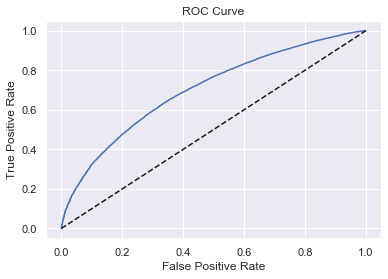

In [63]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [64]:
AUROC = roc_auc_score(df_actual_pred_prob['loan_data_targets_test'],
                               df_actual_pred_prob['y_hat_test_prob'])
AUROC

0.7022299042026836

    # Gini and Kolmogorov-Smirnov

In [65]:
df_actual_pred_prob = df_actual_pred_prob.sort_values('y_hat_test_prob')

In [66]:
df_actual_pred_prob.head()

,loan_data_targets_test,y_hat_test_prob,y_hat_test
42341,1,0.374388,0
42344,1,0.375643,0
39810,0,0.392518,0
40518,0,0.448731,0
40173,0,0.462990,0


In [67]:
df_actual_pred_prob.tail()

,loan_data_targets_test,y_hat_test_prob,y_hat_test
247054,1,0.991281,1
231463,1,0.991346,1
239228,1,0.991731,1
261086,1,0.992142,1
242624,1,0.992735,1


In [68]:
df_actual_pred_prob = df_actual_pred_prob.reset_index()

In [69]:
df_actual_pred_prob.head()

,index,loan_data_targets_test,y_hat_test_prob,y_hat_test
0,42341,1,0.374388,0
1,42344,1,0.375643,0
2,39810,0,0.392518,0
3,40518,0,0.448731,0
4,40173,0,0.462990,0


    # Cumulative proportions

In [70]:
df_actual_pred_prob['Cumulative_N_Population']= df_actual_pred_prob.index + 1
df_actual_pred_prob['Cumulative_N_Good'] = df_actual_pred_prob['loan_data_targets_test'].cumsum()
df_actual_pred_prob['Cumulative_N_Bad'] = df_actual_pred_prob['Cumulative_N_Population'] - df_actual_pred_prob['loan_data_targets_test'].cumsum()

In [71]:
df_actual_pred_prob.head()

,index,loan_data_targets_test,y_hat_test_prob,y_hat_test,Cumulative_N_Population,Cumulative_N_Good,Cumulative_N_Bad
0,42341,1,0.374388,0,1,1,0
1,42344,1,0.375643,0,2,2,0
2,39810,0,0.392518,0,3,2,1
3,40518,0,0.448731,0,4,2,2
4,40173,0,0.462990,0,5,2,3


In [72]:
df_actual_pred_prob['Cumulative_%_Population'] = df_actual_pred_prob['Cumulative_N_Population'] / (df_actual_pred_prob.shape[0])
df_actual_pred_prob['Cumulative_%_Good'] = df_actual_pred_prob['Cumulative_N_Good'] / df_actual_pred_prob['loan_data_targets_test'].sum()
df_actual_pred_prob['Cumulative_%_Bad'] = df_actual_pred_prob['Cumulative_N_Bad'] / (df_actual_pred_prob.shape[0] - df_actual_pred_prob['loan_data_targets_test'].sum())

In [73]:
df_actual_pred_prob.head()

,index,loan_data_targets_test,y_hat_test_prob,y_hat_test,Cumulative_N_Population,Cumulative_N_Good,Cumulative_N_Bad,Cumulative_%_Population,Cumulative_%_Good,Cumulative_%_Bad
0,42341,1,0.374388,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.375643,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.392518,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.448731,0,4,2,2,0.000043,0.000024,0.000196
4,40173,0,0.462990,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

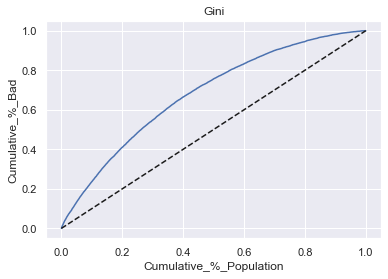

In [74]:
plt.plot(df_actual_pred_prob['Cumulative_%_Population'], df_actual_pred_prob['Cumulative_%_Bad']);
plt.plot(df_actual_pred_prob['Cumulative_%_Population'], df_actual_pred_prob['Cumulative_%_Population'], linestyle = '--', color ='k');
plt.xlabel('Cumulative_%_Population')
plt.ylabel('Cumulative_%_Bad')
plt.title('Gini')

In [75]:
Gini = AUROC * 2 -1

In [76]:
Gini

0.4044598084053672

    # KS Statistics

Text(0.5, 1.0, 'K-S Statistics')

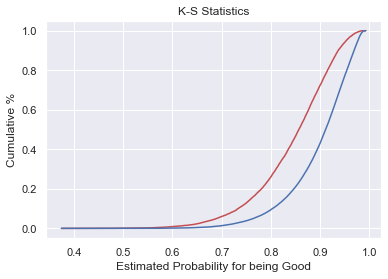

In [77]:
plt.plot(df_actual_pred_prob['y_hat_test_prob'] , df_actual_pred_prob['Cumulative_%_Bad'] , color = 'r')
plt.plot(df_actual_pred_prob['y_hat_test_prob'] , df_actual_pred_prob['Cumulative_%_Good'] , color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('K-S Statistics')

In [78]:
KS = max(df_actual_pred_prob['Cumulative_%_Bad'] - df_actual_pred_prob['Cumulative_%_Good'])
KS

0.2974509964661582

Applying the PD Model

Calculating PD of individual accounts

In [79]:
pd.options.display.max_columns = None

In [80]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,annual_inc:<20K,annual_inc:20K - 30K,annual_inc:30K - 40K,annual_inc:40K - 50K,annual_inc:50K - 60K,annual_inc:60K - 70K,annual_inc:70K - 80K,annual_inc:80K - 90K,annual_inc:90K - 100K,annual_inc:100K - 120K,annual_inc:120K - 140K,annual_inc:>152K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_delinq:>=86
362514,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,NaN,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [81]:
summary_table

,feature name1,Coefficients,p_values
0,Intercept,-1.091182,NaN
1,grade:A,1.126243,2.677771e-35
2,grade:B,0.883510,1.529112e-47
3,grade:C,0.688599,3.002120e-34
4,grade:D,0.500314,7.368673e-21
5,grade:E,0.324259,6.783840e-12
6,grade:F,0.135611,5.746117e-03
7,home_ownership:OWN,0.094114,2.990499e-06
8,home_ownership:MORTGAGE,0.107479,2.033138e-17
9,addr_state:NM_VA,0.037045,2.474207e-01


In [82]:
y_hat_test_prob

array([0.92431357, 0.85930198, 0.88680585, ..., 0.97357598, 0.96010691,
       0.9517426 ])

Creating a Scorecard

In [83]:
summary_table

,feature name1,Coefficients,p_values
0,Intercept,-1.091182,NaN
1,grade:A,1.126243,2.677771e-35
2,grade:B,0.883510,1.529112e-47
3,grade:C,0.688599,3.002120e-34
4,grade:D,0.500314,7.368673e-21
5,grade:E,0.324259,6.783840e-12
6,grade:F,0.135611,5.746117e-03
7,home_ownership:OWN,0.094114,2.990499e-06
8,home_ownership:MORTGAGE,0.107479,2.033138e-17
9,addr_state:NM_VA,0.037045,2.474207e-01


In [84]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Not Verified',
 'purpose:oth__med__vacation',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_date:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'open_acc:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [85]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['feature name1'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,feature name1,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Not Verified,0,NaN
4,purpose:oth__med__vacation,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_date:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [86]:
df_scorecard = pd.concat([summary_table , df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,feature name1,Coefficients,p_values
0,0,Intercept,-1.091182,NaN
1,1,grade:A,1.126243,2.677771e-35
2,2,grade:B,0.883510,1.529112e-47
3,3,grade:C,0.688599,3.002120e-34
4,4,grade:D,0.500314,7.368673e-21
5,5,grade:E,0.324259,6.783840e-12
6,6,grade:F,0.135611,5.746117e-03
7,7,home_ownership:OWN,0.094114,2.990499e-06
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17
9,9,addr_state:NM_VA,0.037045,2.474207e-01


In [87]:
df_scorecard['Original Feature Name'] = df_scorecard['feature name1'].str.split(':').str[0]

In [88]:
df_scorecard

,index,feature name1,Coefficients,p_values,Original Feature Name
0,0,Intercept,-1.091182,NaN,Intercept
1,1,grade:A,1.126243,2.677771e-35,grade
2,2,grade:B,0.883510,1.529112e-47,grade
3,3,grade:C,0.688599,3.002120e-34,grade
4,4,grade:D,0.500314,7.368673e-21,grade
5,5,grade:E,0.324259,6.783840e-12,grade
6,6,grade:F,0.135611,5.746117e-03,grade
7,7,home_ownership:OWN,0.094114,2.990499e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17,home_ownership
9,9,addr_state:NM_VA,0.037045,2.474207e-01,addr_state


In [89]:
min_score = 300
max_score = 850

In [90]:
df_scorecard.groupby('Original Feature Name')['Coefficients'].min()

Original Feature Name
Intercept                     -1.091182
addr_state                     0.000000
annual_inc                    -0.069072
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
major_purch__car__home_impr    0.052263
mths_since_earliest_cr_line    0.000000
mths_since_issue_date         -0.073526
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
open_acc                      -0.042191
purpose                       -0.214130
term                           0.000000
verification_status           -0.097685
Name: Coefficients, dtype: float64

In [91]:
min_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].min().sum()
min_sum_coef

-1.5355224946613661

In [92]:
df_scorecard.groupby('Original Feature Name')['Coefficients'].max()

Original Feature Name
Intercept                     -1.091182
addr_state                     0.522597
annual_inc                     0.585033
dti                            0.361960
emp_length                     0.125897
grade                          1.126243
home_ownership                 0.107479
initial_list_status            0.054306
inq_last_6mths                 0.672352
int_rate                       0.887579
major_purch__car__home_impr    0.052263
mths_since_earliest_cr_line    0.132941
mths_since_issue_date          1.082192
mths_since_last_delinq         0.290118
mths_since_last_record         0.570567
open_acc                       0.119839
purpose                        0.091007
term                           0.077995
verification_status            0.000000
Name: Coefficients, dtype: float64

In [93]:
max_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].max().sum()
max_sum_coef

5.769187001359555

In [94]:
df_scorecard['score_calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,feature name1,Coefficients,p_values,Original Feature Name,score_calculation
0,0,Intercept,-1.091182,NaN,Intercept,-82.159356
1,1,grade:A,1.126243,2.677771e-35,grade,84.799203
2,2,grade:B,0.883510,1.529112e-47,grade,66.522918
3,3,grade:C,0.688599,3.002120e-34,grade,51.847315
4,4,grade:D,0.500314,7.368673e-21,grade,37.670566
5,5,grade:E,0.324259,6.783840e-12,grade,24.414730
6,6,grade:F,0.135611,5.746117e-03,grade,10.210645
7,7,home_ownership:OWN,0.094114,2.990499e-06,home_ownership,7.086193
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17,home_ownership,8.092538
9,9,addr_state:NM_VA,0.037045,2.474207e-01,addr_state,2.789292


In [95]:
df_scorecard['score_calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,feature name1,Coefficients,p_values,Original Feature Name,score_calculation
0,0,Intercept,-1.091182,NaN,Intercept,333.456107
1,1,grade:A,1.126243,2.677771e-35,grade,84.799203
2,2,grade:B,0.883510,1.529112e-47,grade,66.522918
3,3,grade:C,0.688599,3.002120e-34,grade,51.847315
4,4,grade:D,0.500314,7.368673e-21,grade,37.670566
5,5,grade:E,0.324259,6.783840e-12,grade,24.414730
6,6,grade:F,0.135611,5.746117e-03,grade,10.210645
7,7,home_ownership:OWN,0.094114,2.990499e-06,home_ownership,7.086193
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17,home_ownership,8.092538
9,9,addr_state:NM_VA,0.037045,2.474207e-01,addr_state,2.789292


In [96]:
df_scorecard['score_prelim'] = df_scorecard['score_calculation'].round()
df_scorecard

,index,feature name1,Coefficients,p_values,Original Feature Name,score_calculation,score_prelim
0,0,Intercept,-1.091182,NaN,Intercept,333.456107,333.0
1,1,grade:A,1.126243,2.677771e-35,grade,84.799203,85.0
2,2,grade:B,0.883510,1.529112e-47,grade,66.522918,67.0
3,3,grade:C,0.688599,3.002120e-34,grade,51.847315,52.0
4,4,grade:D,0.500314,7.368673e-21,grade,37.670566,38.0
5,5,grade:E,0.324259,6.783840e-12,grade,24.414730,24.0
6,6,grade:F,0.135611,5.746117e-03,grade,10.210645,10.0
7,7,home_ownership:OWN,0.094114,2.990499e-06,home_ownership,7.086193,7.0
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17,home_ownership,8.092538,8.0
9,9,addr_state:NM_VA,0.037045,2.474207e-01,addr_state,2.789292,3.0


In [97]:
min_sum_score_prelim = df_scorecard.groupby('Original Feature Name')['score_prelim'].min().sum()
min_sum_score_prelim

300.0

In [98]:
max_sum_score_prelim = df_scorecard.groupby('Original Feature Name')['score_prelim'].max().sum()
max_sum_score_prelim

849.0

In [99]:
df_scorecard['Diff'] = df_scorecard['score_calculation'] - df_scorecard['score_prelim']
df_scorecard

,index,feature name1,Coefficients,p_values,Original Feature Name,score_calculation,score_prelim,Diff
0,0,Intercept,-1.091182,NaN,Intercept,333.456107,333.0,0.456107
1,1,grade:A,1.126243,2.677771e-35,grade,84.799203,85.0,-0.200797
2,2,grade:B,0.883510,1.529112e-47,grade,66.522918,67.0,-0.477082
3,3,grade:C,0.688599,3.002120e-34,grade,51.847315,52.0,-0.152685
4,4,grade:D,0.500314,7.368673e-21,grade,37.670566,38.0,-0.329434
5,5,grade:E,0.324259,6.783840e-12,grade,24.414730,24.0,0.414730
6,6,grade:F,0.135611,5.746117e-03,grade,10.210645,10.0,0.210645
7,7,home_ownership:OWN,0.094114,2.990499e-06,home_ownership,7.086193,7.0,0.086193
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17,home_ownership,8.092538,8.0,0.092538
9,9,addr_state:NM_VA,0.037045,2.474207e-01,addr_state,2.789292,3.0,-0.210708


In [100]:
df_scorecard['Score_Final'] = df_scorecard['score_prelim']
df_scorecard['Score_Final'][35] = 82
df_scorecard

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,feature name1,Coefficients,p_values,Original Feature Name,score_calculation,score_prelim,Diff,Score_Final
0,0,Intercept,-1.091182,NaN,Intercept,333.456107,333.0,0.456107,333.0
1,1,grade:A,1.126243,2.677771e-35,grade,84.799203,85.0,-0.200797,85.0
2,2,grade:B,0.883510,1.529112e-47,grade,66.522918,67.0,-0.477082,67.0
3,3,grade:C,0.688599,3.002120e-34,grade,51.847315,52.0,-0.152685,52.0
4,4,grade:D,0.500314,7.368673e-21,grade,37.670566,38.0,-0.329434,38.0
5,5,grade:E,0.324259,6.783840e-12,grade,24.414730,24.0,0.414730,24.0
6,6,grade:F,0.135611,5.746117e-03,grade,10.210645,10.0,0.210645,10.0
7,7,home_ownership:OWN,0.094114,2.990499e-06,home_ownership,7.086193,7.0,0.086193,7.0
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17,home_ownership,8.092538,8.0,0.092538,8.0
9,9,addr_state:NM_VA,0.037045,2.474207e-01,addr_state,2.789292,3.0,-0.210708,3.0


In [101]:
min_sum_score_final = df_scorecard.groupby('Original Feature Name')['Score_Final'].min().sum()
min_sum_score_final

300.0

In [102]:
max_sum_score_final = df_scorecard.groupby('Original Feature Name')['Score_Final'].max().sum()
max_sum_score_final

850.0

Calculating Credit Score

In [103]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,annual_inc:<20K,annual_inc:20K - 30K,annual_inc:30K - 40K,annual_inc:40K - 50K,annual_inc:50K - 60K,annual_inc:60K - 70K,annual_inc:70K - 80K,annual_inc:80K - 90K,annual_inc:90K - 100K,annual_inc:100K - 120K,annual_inc:120K - 140K,annual_inc:>152K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_delinq:>=86
362514,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,NaN,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [104]:
df_scorecard

,index,feature name1,Coefficients,p_values,Original Feature Name,score_calculation,score_prelim,Diff,Score_Final
0,0,Intercept,-1.091182,NaN,Intercept,333.456107,333.0,0.456107,333.0
1,1,grade:A,1.126243,2.677771e-35,grade,84.799203,85.0,-0.200797,85.0
2,2,grade:B,0.883510,1.529112e-47,grade,66.522918,67.0,-0.477082,67.0
3,3,grade:C,0.688599,3.002120e-34,grade,51.847315,52.0,-0.152685,52.0
4,4,grade:D,0.500314,7.368673e-21,grade,37.670566,38.0,-0.329434,38.0
5,5,grade:E,0.324259,6.783840e-12,grade,24.414730,24.0,0.414730,24.0
6,6,grade:F,0.135611,5.746117e-03,grade,10.210645,10.0,0.210645,10.0
7,7,home_ownership:OWN,0.094114,2.990499e-06,home_ownership,7.086193,7.0,0.086193,7.0
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17,home_ownership,8.092538,8.0,0.092538,8.0
9,9,addr_state:NM_VA,0.037045,2.474207e-01,addr_state,2.789292,3.0,-0.210708,3.0


In [105]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,annual_inc:<20K,annual_inc:20K - 30K,annual_inc:30K - 40K,annual_inc:40K - 50K,annual_inc:50K - 60K,annual_inc:60K - 70K,annual_inc:70K - 80K,annual_inc:80K - 90K,annual_inc:90K - 100K,annual_inc:100K - 120K,annual_inc:120K - 140K,annual_inc:>152K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_delinq:>=86
362514,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,NaN,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [106]:
df_scorecard

,index,feature name1,Coefficients,p_values,Original Feature Name,score_calculation,score_prelim,Diff,Score_Final
0,0,Intercept,-1.091182,NaN,Intercept,333.456107,333.0,0.456107,333.0
1,1,grade:A,1.126243,2.677771e-35,grade,84.799203,85.0,-0.200797,85.0
2,2,grade:B,0.883510,1.529112e-47,grade,66.522918,67.0,-0.477082,67.0
3,3,grade:C,0.688599,3.002120e-34,grade,51.847315,52.0,-0.152685,52.0
4,4,grade:D,0.500314,7.368673e-21,grade,37.670566,38.0,-0.329434,38.0
5,5,grade:E,0.324259,6.783840e-12,grade,24.414730,24.0,0.414730,24.0
6,6,grade:F,0.135611,5.746117e-03,grade,10.210645,10.0,0.210645,10.0
7,7,home_ownership:OWN,0.094114,2.990499e-06,home_ownership,7.086193,7.0,0.086193,7.0
8,8,home_ownership:MORTGAGE,0.107479,2.033138e-17,home_ownership,8.092538,8.0,0.092538,8.0
9,9,addr_state:NM_VA,0.037045,2.474207e-01,addr_state,2.789292,3.0,-0.210708,3.0


In [107]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [108]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [109]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,annual_inc:<20K,annual_inc:20K - 30K,annual_inc:30K - 40K,annual_inc:40K - 50K,annual_inc:50K - 60K,annual_inc:60K - 70K,annual_inc:70K - 80K,annual_inc:80K - 90K,annual_inc:90K - 100K,annual_inc:100K - 120K,annual_inc:120K - 140K,annual_inc:>152K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_delinq:>=86
362514,1,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,NaN,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,NaN,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,NaN,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [110]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['feature name1'].values]

In [111]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,annual_inc:20K - 30K,annual_inc:30K - 40K,annual_inc:40K - 50K,annual_inc:50K - 60K,annual_inc:60K - 70K,annual_inc:70K - 80K,annual_inc:80K - 90K,annual_inc:90K - 100K,annual_inc:100K - 120K,annual_inc:120K - 140K,annual_inc:>152K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_delinq:>=86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Not Verified,purpose:oth__med__vacation,initial_list_status:f,term:60,emp_length:0,mths_since_issue_date:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,open_acc:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,NaN,0,NaN,1,1,1,0,0,0,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0,NaN,0,1,0,0,1,0,0,0,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,NaN,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,NaN,0,NaN,0,1,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,NaN,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0


In [112]:
type(inputs_test_with_ref_cat_w_intercept)

pandas.core.frame.DataFrame

In [113]:
inputs_test_with_ref_cat_w_intercept.fillna(0, inplace=True)

In [114]:
inputs_test_with_ref_cat_w_intercept.isnull().sum()

Intercept                                       0
grade:A                                         0
grade:B                                         0
grade:C                                         0
grade:D                                         0
grade:E                                         0
grade:F                                         0
home_ownership:OWN                              0
home_ownership:MORTGAGE                         0
addr_state:NM_VA                                0
addr_state:NY                                   0
addr_state:OK_TN_MO_LA_MD_NC                    0
addr_state:CA                                   0
addr_state:UT_KY_AZ_NJ                          0
addr_state:AR_MI_PA_OH_MN                       0
addr_state:RI_MA_DE_SD_IN                       0
addr_state:GA_WA_OR                             0
addr_state:WI_MT                                0
addr_state:TX                                   0
addr_state:IL_CT                                0


In [115]:
scorecard_scores = df_scorecard['Score_Final']
scorecard_scores

0      333.0
1       85.0
2       67.0
3       52.0
4       38.0
5       24.0
6       10.0
7        7.0
8        8.0
9        3.0
10       5.0
11       5.0
12       5.0
13       6.0
14      10.0
15       8.0
16      14.0
17      18.0
18      17.0
19      20.0
20      24.0
21      39.0
22      -7.0
23      -7.0
24     -16.0
25       7.0
26      -1.0
27       4.0
28       4.0
29       6.0
30       8.0
31       9.0
32       7.0
33       5.0
34       9.0
35      82.0
36      66.0
37      59.0
38      43.0
39      31.0
40      13.0
41      -6.0
42      67.0
43      42.0
44      23.0
45       8.0
46       5.0
47       3.0
48       6.0
49       9.0
50      10.0
51      51.0
52      40.0
53      24.0
54       9.0
55       2.0
56      -0.0
57      -2.0
58      -1.0
59       2.0
60      -3.0
61      -5.0
62      -0.0
63       7.0
64      12.0
65      18.0
66      24.0
67      30.0
68      31.0
69      37.0
70      44.0
71      39.0
72      15.0
73      25.0
74      27.0
75      23.0
76      17.0

In [116]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 108)

In [117]:
scorecard_scores.shape

(108,)

In [118]:
scorecard_scores = scorecard_scores.values.reshape(108,1)

In [119]:
scorecard_scores.shape

(108, 1)

In [120]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [121]:
y_scores.head()

,0
362514,605.0
288564,550.0
213591,570.0
263083,625.0
165001,675.0


In [122]:
y_scores.tail()

,0
115,562.0
296284,670.0
61777,688.0
91763,655.0
167512,642.0


CREDIT SCORES and PD

In [123]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [124]:
y_hat_prob_score = np.exp(sum_coef_from_score)/(np.exp(sum_coef_from_score)+1)
y_hat_prob_score.head()

,0
362514,0.925205
288564,0.856289
213591,0.885991
263083,0.941635
165001,0.969081


In [125]:
y_hat_test_prob[0:5]

array([0.92431357, 0.85930198, 0.88680585, 0.94098766, 0.96900933])

Setting Cut-Offs

In [126]:
cut_offs

array([1.99273476, 0.99273476, 0.99076044, ..., 0.47642977, 0.39251843,
       0.3743876 ])

In [127]:
cut_offs.shape

(17175,)

In [128]:
df_cutoffs = pd.concat([pd.DataFrame(cut_offs), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)

In [129]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [130]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992735,0.000000,0.000000
1,0.992735,0.000000,0.000012
2,0.990760,0.000000,0.000120
3,0.990739,0.000098,0.000120
4,0.989493,0.000098,0.000590


In [131]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [132]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [133]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3182.0
1,0.992735,0.000000,0.000012,786.0
2,0.990760,0.000000,0.000120,768.0
3,0.990739,0.000098,0.000120,767.0
4,0.989493,0.000098,0.000590,758.0


In [134]:
df_cutoffs['Score'][0] = max_score

In [135]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992735,0.000000,0.000012,786.0
2,0.990760,0.000000,0.000120,768.0
3,0.990739,0.000098,0.000120,767.0
4,0.989493,0.000098,0.000590,758.0


In [136]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17170,0.488928,0.999411,0.999964,412.0
17171,0.482533,0.999607,0.999964,410.0
17172,0.476430,0.999607,0.999976,409.0
17173,0.392518,1.000000,0.999976,383.0
17174,0.374388,1.000000,1.000000,377.0


In [137]:
def n_approved(p):
    return np.where(df_actual_pred_prob['y_hat_test_prob'] >= p, 1, 0).sum()

In [138]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_pred_prob['y_hat_test_prob'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_pred_prob['y_hat_test_prob'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [140]:
df_cutoffs.head() , df_cutoffs.tail()

(   thresholds       fpr       tpr  Score  N Approved  N Rejected  \
 0    1.000000  0.000000  0.000000  850.0           0       93257   
 1    0.992735  0.000000  0.000012  786.0           1       93256   
 2    0.990760  0.000000  0.000120  768.0          10       93247   
 3    0.990739  0.000098  0.000120  767.0          11       93246   
 4    0.989493  0.000098  0.000590  758.0          50       93207   
 
    Approval Rate  Rejection Rate  
 0       0.000000        1.000000  
 1       0.000011        0.999989  
 2       0.000107        0.999893  
 3       0.000118        0.999882  
 4       0.000536        0.999464  ,
        thresholds       fpr       tpr  Score  N Approved  N Rejected  \
 17170    0.488928  0.999411  0.999964  412.0       93248           9   
 17171    0.482533  0.999607  0.999964  410.0       93250           7   
 17172    0.476430  0.999607  0.999976  409.0       93251           6   
 17173    0.392518  1.000000  0.999976  383.0       93255           2   
 1

    #  90% cutoff approval and rejection

In [141]:
df_cutoffs.iloc[5000:6200,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.902783,0.263003,0.552265,583.0,48555,44702,0.520658,0.479342
5001,0.902778,0.263003,0.552289,583.0,48557,44700,0.520679,0.479321
5002,0.902773,0.263199,0.552289,583.0,48559,44698,0.520701,0.479299
5003,0.902769,0.263199,0.552301,583.0,48560,44697,0.520712,0.479288
5004,0.902769,0.263297,0.552301,583.0,48561,44696,0.520722,0.479278
5005,0.902761,0.263297,0.552361,583.0,48566,44691,0.520776,0.479224
5006,0.902760,0.263395,0.552361,583.0,48567,44690,0.520787,0.479213
5007,0.902753,0.263395,0.552410,583.0,48571,44686,0.520830,0.479170
5008,0.902751,0.263494,0.552410,583.0,48572,44685,0.520840,0.479160
5009,0.902741,0.263494,0.552506,583.0,48580,44677,0.520926,0.479074


    # 95% cutoff approval and rejection

In [143]:
df_cutoffs.iloc[1000:2000,:]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.952535,0.050736,0.211299,641.0,18069,75188,0.193755,0.806245
1001,0.952532,0.050834,0.211299,641.0,18070,75187,0.193766,0.806234
1002,0.952511,0.050834,0.211444,641.0,18082,75175,0.193894,0.806106
1003,0.952511,0.050932,0.211444,641.0,18083,75174,0.193905,0.806095
1004,0.952467,0.050932,0.211709,641.0,18105,75152,0.194141,0.805859
1005,0.952463,0.051030,0.211709,641.0,18106,75151,0.194152,0.805848
1006,0.952429,0.051030,0.211949,641.0,18126,75131,0.194366,0.805634
1007,0.952427,0.051129,0.211949,641.0,18127,75130,0.194377,0.805623
1008,0.952412,0.051129,0.212094,641.0,18139,75118,0.194506,0.805494
1009,0.952411,0.051227,0.212094,641.0,18140,75117,0.194516,0.805484


In [ ]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [ ]:
df_scorecard.to_csv('df_scorecard.csv')